<a href="https://colab.research.google.com/github/AshwiniPriya/Data-Science-Projects/blob/main/DIGITAL_MARKETING_ASHWINI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pal=sns.color_palette("flare", as_cmap=True)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving online_advertising_performance_data.csv to online_advertising_performance_data.csv


In [ ]:
#import pandas as pd
dm=pd.read_csv('online_advertising_performance_data.csv')
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [ ]:
dm.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [ ]:
dm.tail()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
15403,April,1,camp 1,Low,160 x 600,ghi,16,0.0249,0,0.0000,0,0.0000,NaN,NaN
15404,April,1,camp 1,Low,160 x 600,mno,2234,0.4044,10,1.8347,3,101.7494,NaN,NaN
15405,June,29,camp 1,High,800 x 250,ghi,1,0.0157,0,0.0000,0,0.0000,NaN,NaN
15406,June,29,camp 1,High,800 x 250,mno,4,0.0123,0,0.0000,0,0.0000,NaN,NaN
15407,June,29,camp 3,High,240 x 400,def,1209,0.3184,2,0.1115,3,110.4224,NaN,NaN


In [ ]:
print('1.size= ',dm.size)
print('2.shape= ',dm.shape)
print('3.dimension= ',dm.ndim)
print('4.null value= ')
print(dm[dm.isnull()].sum())

1.size=  215712
2.shape=  (15408, 14)
3.dimension=  2
4.null value= 
month                        0
day                        0.0
campaign_number              0
user_engagement              0
banner                       0
placement                    0
displays                   0.0
cost                       0.0
clicks                     0.0
revenue                    0.0
post_click_conversions     0.0
post_click_sales_amount    0.0
Unnamed: 12                0.0
Unnamed: 13                0.0
dtype: object


**ANSWERS**

1.What is the overall trend in user engagement throughout the campaign period?

Ans== Overall trend in user engagement throughout the campaign period is taken lead by camp 3

In [ ]:
trend=pd.crosstab(index=dm.campaign_number,columns=dm.user_engagement)
trend

user_engagement,High,Low,Medium
campaign_number,,,
camp 1,2599,2025,2253
camp 2,0,761,853
camp 3,2285,2249,2383


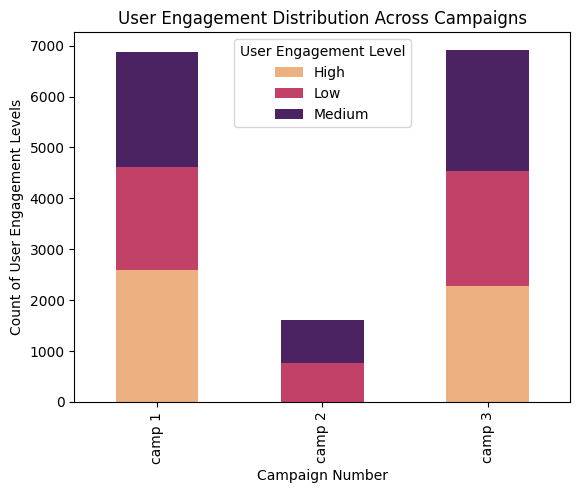

In [ ]:
trend.plot(kind='bar', stacked=True,cmap=pal)
plt.title('User Engagement Distribution Across Campaigns')
plt.xlabel('Campaign Number')
plt.ylabel('Count of User Engagement Levels')
plt.legend(title='User Engagement Level')
plt.show()

In [ ]:
campaign_totals = trend.sum(axis=1)

max_campaign = campaign_totals.idxmax() #camp name
max_value = campaign_totals.max() #camp values

print(f"Campaign {max_campaign} has the highest user engagement with a count of {max_value}.")


Campaign camp 3 has the highest user engagement with a count of 6917.


2.	How does the size of the ad (banner) impact the number of clicks generated?

In [ ]:
dm['banner'].max()

'800 x 250'

In [ ]:
dm['banner'].min()

'160 x 600'

banner
800 x 250         12
468 x 60        1295
670 x 90       37203
580 x 400     120681
160 x 600     239570
300 x 250     411214
728 x 90      569606
240 x 400    1113256
Name: clicks, dtype: int64


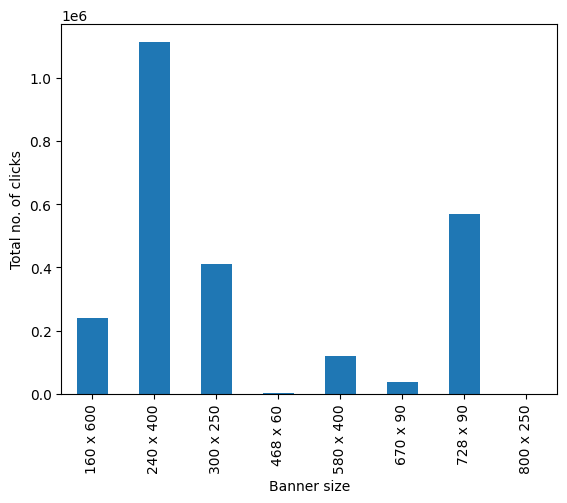

<Figure size 640x480 with 0 Axes>

In [ ]:
banner_size=dm.groupby("banner")['clicks']
a=banner_size.sum()
table=a.sort_values(ascending=True)
print(table)
a.plot(kind='bar')
plt.xlabel("Banner size")
plt.ylabel("Total no. of clicks")
plt.show()
plt.tight_layout()

In [ ]:
banner_max=table.idxmax()
clicks_max=table.max()
print(f'{banner_max} has the highest number of clicks of {clicks_max}')

240 x 400 has the highest number of clicks of 1113256


So, from the bar plot 240 x 400 has more number of clicks (1113256).

SIZE PLAYS MAJOR ROLE IN NUMBER OF CLICKS

***Higher the banner size-lower the number of clicks

***Moderate the banner size-more number of clicks (EFFECTIVE)

3.	Which publisher spaces (placements) yielded the highest number of displays and clicks?

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [ ]:
a=dm['placement'].unique()

In [ ]:
dm['displays']

,displays
0,4
1,20170
2,14701
3,171259
4,552
...,...
15403,16
15404,2234
15405,1
15406,4


In [ ]:
dm['clicks']

,clicks
0,0
1,158
2,158
3,1796
4,1
...,...
15403,0
15404,10
15405,0
15406,0


In [ ]:
dm.groupby("placement")[['displays','clicks']]

            displays   clicks      total
placement                               
abc           242142     1584     243726
def         28177492   176097   28353589
ghi         59740415  1247049   60987464
jkl          7692732    75063    7767795
mno        143161775   993039  144154814
---------------------------
mno has the highest number of both displays and clicks of 144154814
Axes(0.125,0.11;0.775x0.77)


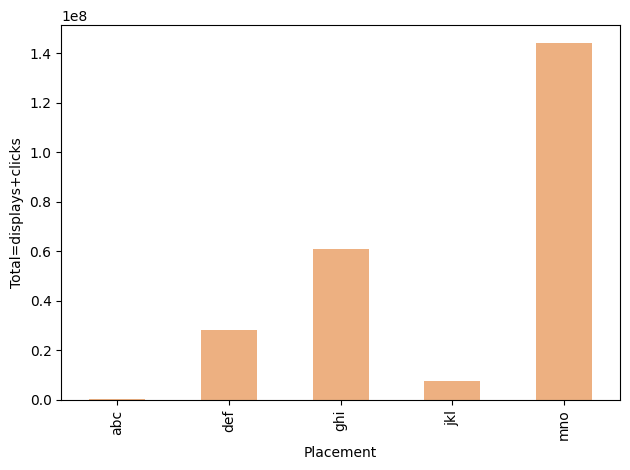

In [ ]:
a=dm.groupby("placement")[['displays','clicks']].sum()
a['total']=a['displays']+a['clicks']
print(a)
#publisher who yields the highest number of both displays and clicks
high_pub=a['total'].idxmax()
high=a['total'].max()
print("---------------------------")
print(f'{high_pub} has the highest number of both displays and clicks of {high}')
print(a['total'].plot(kind='bar',cmap=pal))
plt.xlabel('Placement')
plt.ylabel('Total=displays+clicks')
plt.tight_layout()

In [ ]:
#only displays
display_max=a['displays'].max()
pub_max=a['displays'].idxmax()
print(f'{pub_max} has the highest number of  displays of {display_max}')


mno has the highest number of  displays of 143161775


In [ ]:
#only clicks
clicks_max=a['clicks'].max()
pub_max=a['clicks'].idxmax()
print(f'{pub_max} has the highest number of  displays of {clicks_max}')


ghi has the highest number of  displays of 1247049


4.	Is there a correlation between the cost of serving ads and the revenue generated from clicks?

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [ ]:
dm[['cost','revenue']].corr()

,cost,revenue
cost,1.00000,0.76052
revenue,0.76052,1.00000


<Axes: xlabel='cost', ylabel='revenue'>

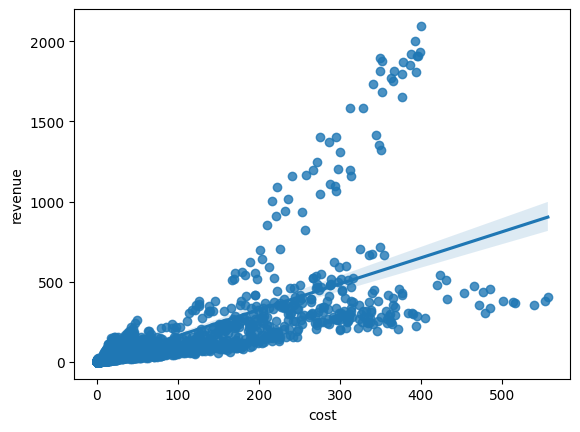

In [ ]:
sns.regplot(x='cost', y='revenue',data=dm)
#The output provides a correlation value. A positive correlation close to 1 indicates that as ad costs increase, so does revenue, suggesting effective spending.

5.	What is the average revenue generated per click for Company X during the campaign period?

In [ ]:
total_revenue=dm['revenue'].sum()
total_clicks=dm['clicks'].sum()
print('total_revenue= ',total_revenue)
print('total_clicks= ',total_clicks)
#Average Revenue Per Click= Total Revenue/Total Number of Clicks
avg_rpc= total_revenue/ total_clicks
print("average revenue generated per click is ",avg_rpc)



total_revenue=  276264.5621
total_clicks=  2492837
average revenue generated per click is  0.1108233559193802


In [ ]:
dm['campaign_number'].unique()

array(['camp 1', 'camp 2', 'camp 3'], dtype=object)

                     revenue   clicks   average
campaign_number                                
camp 1           230535.3563  1409136  0.163601
camp 2            34890.4153   881158  0.039596
camp 3            10838.7905   202543  0.053514


Text(0.5, 1.0, 'average revenue generated per click during campaign period')

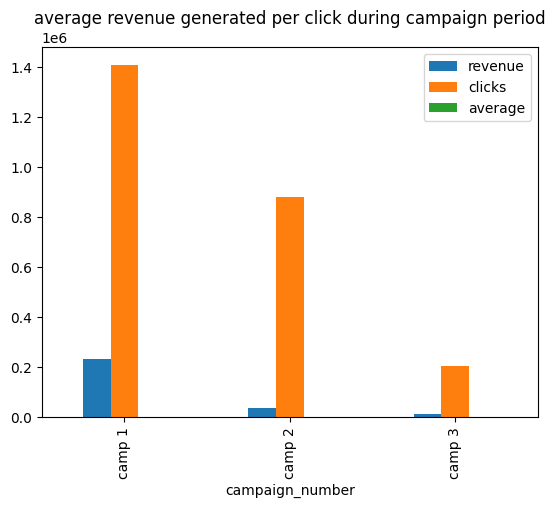

In [ ]:
avg_rpc=dm.groupby('campaign_number')[['revenue','clicks']].sum()
avg_rpc['average']=avg_rpc['revenue']/avg_rpc['clicks']
print(avg_rpc)
avg_rpc.plot(kind='bar')
more=avg_rpc['average'].max()
more_camp=avg_rpc['average'].idxmax().capitalize()
plt.title("average revenue generated per click during campaign period")


In [ ]:
print(f'{more_camp} has highest average revenue per clicks of {more}')

Camp 1 has highest average revenue per clicks of 0.16360050151298386


6.	Which campaigns had the highest post-click conversion rates?

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

Text(0.5, 1.0, 'highest post-click conversion rates')

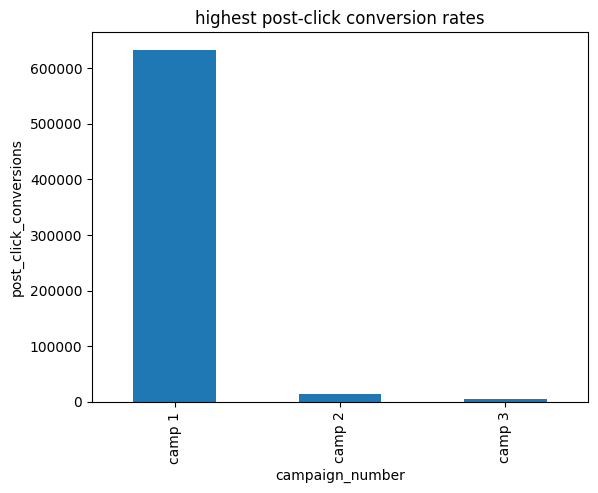

In [ ]:
highest_post_click_conversion_rates=dm.groupby('campaign_number')['post_click_conversions'].sum()
#bar chart
highest_post_click_conversion_rates.plot(kind='bar')
plt.ylabel('post_click_conversions')
plt.title('highest post-click conversion rates')

In [ ]:
a=highest_post_click_conversion_rates.idxmax()
b=highest_post_click_conversion_rates.max()
print(f'{a} had the highest post-click conversion rates {b}')

camp 1 had the highest post-click conversion rates 633085


7.	Are there any specific trends or patterns in post-click sales amounts over time?

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [ ]:
dm['day'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
dm['month'].unique()

array(['April', 'May', 'June'], dtype=object)

In [ ]:
trends_overtime=dm.groupby('day')['post_click_sales_amount'].sum()
trends_overtime

,post_click_sales_amount
day,
1,1.132005e+06
2,1.124887e+06
3,1.274858e+06
4,1.240006e+06
5,1.327967e+06
6,1.222323e+06
7,1.059744e+06
8,1.051773e+06
9,1.037736e+06


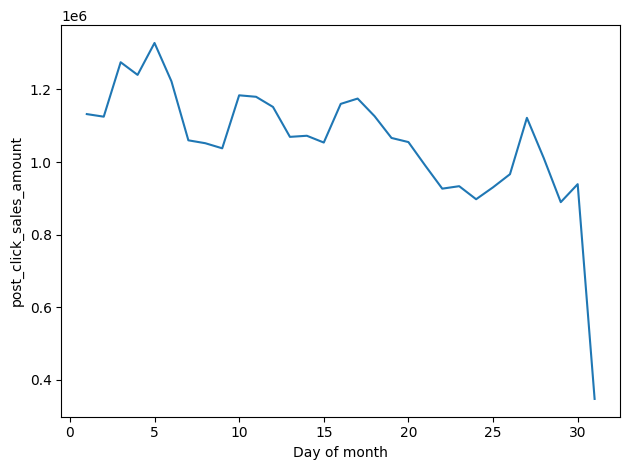

In [ ]:
trends_overtime.plot(kind='line')
plt.xlabel("Day of month")
plt.ylabel("post_click_sales_amount")
plt.tight_layout()
#plt.legend(title=" day increases,post_click_sales_amount decreases ")

As the day passes by,post_click_sales_amount decreases drastically

8.	How does the level of user engagement vary across different banner sizes?

In [ ]:
user_engagement=pd.crosstab(index=dm.banner,columns=dm.user_engagement)
#dm.groupby('banner')['user_engagement']
user_engagement

user_engagement,High,Low,Medium
banner,,,
160 x 600,573,590,642
240 x 400,729,848,848
300 x 250,872,949,999
468 x 60,637,563,699
580 x 400,182,212,212
670 x 90,728,777,847
728 x 90,1018,1007,1117
800 x 250,145,89,125


Text(0.5, 1.0, 'level of user engagement vary across different banner sizes')

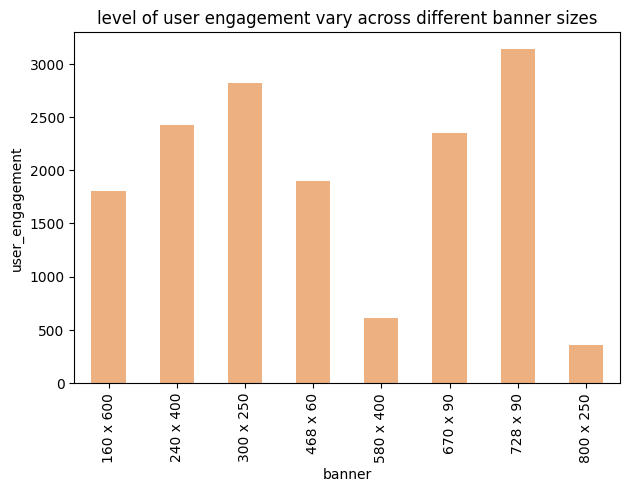

In [ ]:
count=dm.groupby('banner')['user_engagement'].count()
count.plot(kind='bar',cmap=pal)
plt.ylabel('user_engagement')
plt.tight_layout()
plt.title("level of user engagement vary across different banner sizes")

In [ ]:
count

,user_engagement
banner,
160 x 600,1805
240 x 400,2425
300 x 250,2820
468 x 60,1899
580 x 400,606
670 x 90,2352
728 x 90,3142
800 x 250,359


Based on the bar chart, you can analyze how user engagement varies by banner size:

High Engagement Sizes: Identify which banner sizes have the highest user engagement. For instance, 728 x 90 has the highest engagement in your dataset.

Low Engagement Sizes: Notice the banner sizes with the lowest engagement, such as 800 x 250.

Patterns: Look for any patterns or correlations between banner size and engagement. Larger banners may have more engagement, but this isn't always the case. In your data:

The 728 x 90 size has the highest user engagement.
The 580 x 400 size has relatively low engagement.

9.	Which placement types result in the highest post-click conversion rates?

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [ ]:
dm['placement'].unique()

array(['abc', 'def', 'ghi', 'mno', 'jkl', nan], dtype=object)

In [ ]:
dm['post_click_conversions']

,post_click_conversions
0,0
1,23
2,78
3,617
4,0
...,...
15403,0
15404,3
15405,0
15406,0


In [ ]:
most_pcc_rate=dm.groupby("placement")['post_click_conversions'].sum()
most_pcc_rate

,post_click_conversions
placement,
abc,824
def,29856
ghi,337063
jkl,20853
mno,263170


In [ ]:
placement=most_pcc_rate.idxmax().upper()
pcc=most_pcc_rate.max()
print(f'Placement {placement} type result in the highest post-click conversion rates {pcc}')

Placement GHI type result in the highest post-click conversion rates 337063


Text(0.5, 1.0, 'placement vs post_click_conversions')

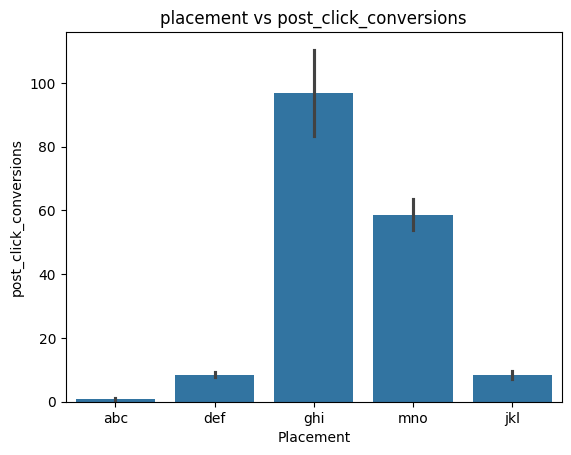

In [ ]:
sns.barplot(x='placement',y='post_click_conversions',data=dm)
plt.xlabel('Placement')
plt.ylabel('post_click_conversions')
plt.title("placement vs post_click_conversions")

10.	Can we identify any seasonal patterns or fluctuations in displays and clicks throughout the campaign period?

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [ ]:
sds=dm.groupby('day')[['displays','clicks']].sum()
sds

,displays,clicks
day,,
1,9493042,98573
2,9209672,92796
3,10493802,109689
4,11265219,116256
5,10662291,110497
6,10526190,102621
7,8538064,87480
8,8317824,83832
9,8024387,73642


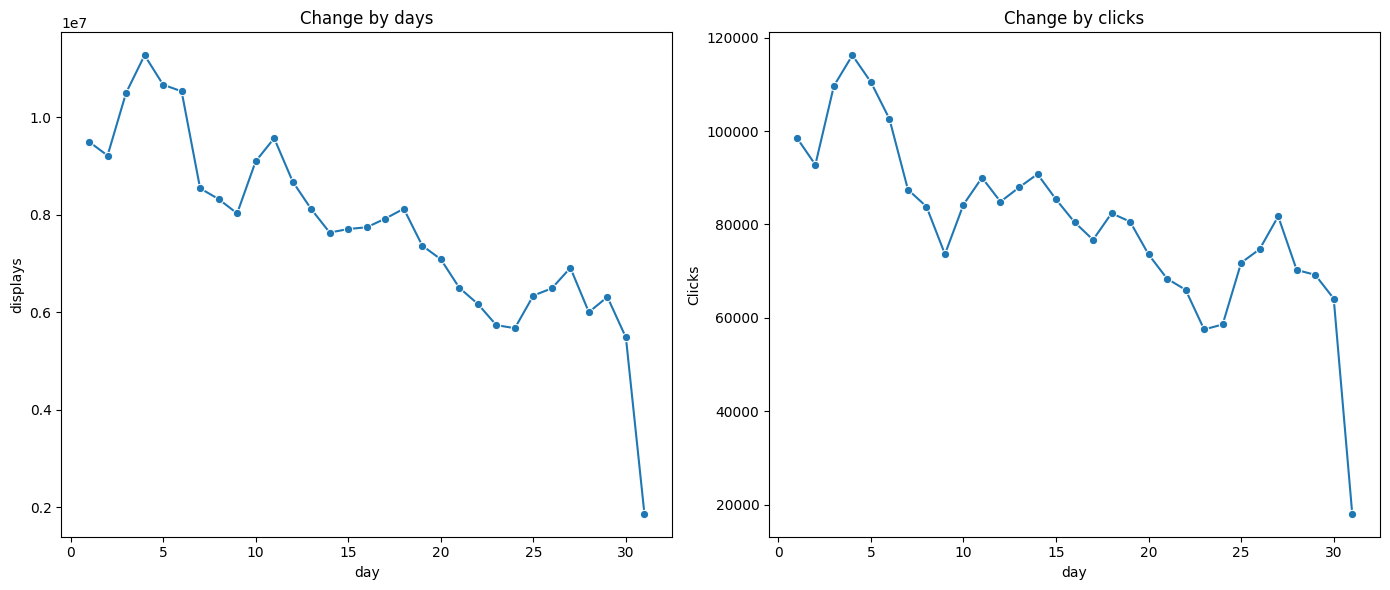

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#DISPLAYS
sns.lineplot(x='day', y='displays', data=sds, marker='o', ax=ax[0])
ax[0].set_title('Change by days')
ax[0].set_ylabel('displays')
#CLICKS
sns.lineplot(x='day',y='clicks',data=sds,marker='o',ax=ax[1])
ax[1].set_title("Change by clicks")
ax[1].set_ylabel("Clicks")
plt.tight_layout()

11.	Is there a correlation between user engagement levels and the revenue generated?

In [ ]:
dm['user_engagement'].count()

15408

In [ ]:
high=dm['user_engagement']=='High'
high.sum()

4884

In [ ]:
low=dm['user_engagement']=='Low'
low.sum()

5035

In [ ]:
medium=dm['user_engagement']=='Medium'
medium.sum()

5489

In [ ]:
user_engagement_total=(high+low+medium)
user_engagement_total.sum()

15408

In [ ]:
revenue=dm['revenue']
revenue.sum()

276264.5621

<Axes: xlabel='user_engagement'>

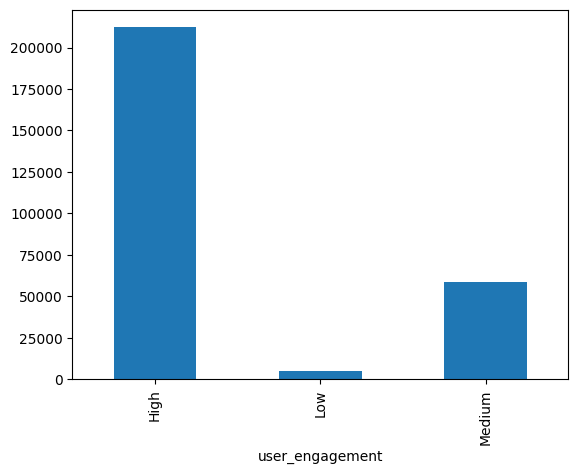

In [ ]:
ass= dm.groupby('user_engagement')['revenue'].sum()
ass.plot(kind='bar')

Correlation between user engagement and revenue: -0.13
----------------------------------------------------------------------------------------------------


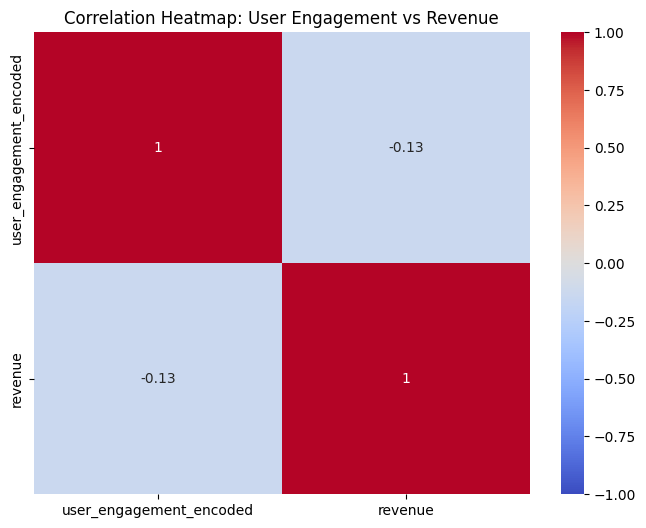

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

label_encoder = LabelEncoder()
dm['user_engagement_encoded'] = label_encoder.fit_transform(dm['user_engagement'])

# Calculate the Pearson correlation between user engagement and revenue
engagement_revenue_corr, _ = pearsonr(dm['user_engagement_encoded'], dm['revenue'])

print(f'Correlation between user engagement and revenue: {engagement_revenue_corr:.2f}')
print("----------------------------------------------------------------------------------------------------")
plt.figure(figsize=(8, 6))
sns.heatmap(dm[['user_engagement_encoded', 'revenue']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: User Engagement vs Revenue')
plt.show()

12.	Are there any outliers in terms of cost, clicks, or revenue that warrant further investigation?

In [ ]:
def finding_outliers(data):
  Q1=data.quantile(0.25) #Q1 is 25% of outliers
  Q3=data.quantile(0.75) #Q3 is 75% of outliers
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  outliers=data[(data<lower_bound)| (data>upper_bound)]
  return outliers

1         26.7824
2         27.6304
3        216.8750
9         11.1678
10        50.5157
           ...   
15320    208.0751
15322    105.7007
15331      8.3755
15337      6.6968
15352      9.0831
Name: cost, Length: 2515, dtype: float64


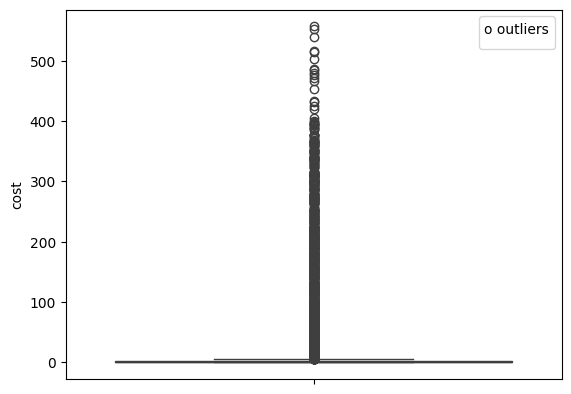

In [ ]:
#outliers of cost
outliers_cost=finding_outliers(dm['cost'])
print(outliers_cost)
sns.boxplot(data=dm,y='cost')
plt.legend(title='o outliers')

1         158
2         158
3        1796
9         185
10        309
         ... 
15304     229
15320    1235
15322     649
15362     182
15401     195
Name: clicks, Length: 2325, dtype: int64


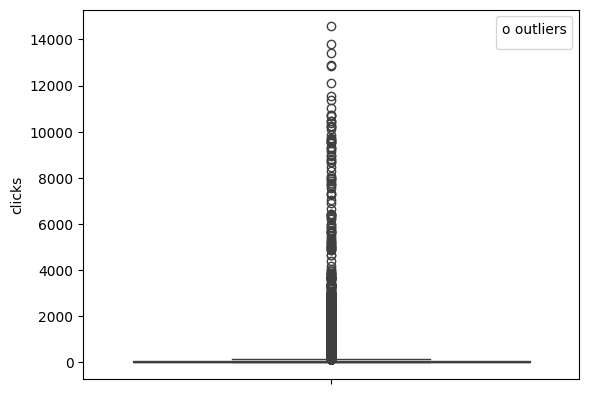

In [ ]:
#outliers of clicks
outliers_clicks=finding_outliers(dm['clicks'])
print(outliers_clicks)
sns.boxplot(data=dm,y='clicks')
plt.legend(title='o outliers')

1         28.9717
2         28.9771
3        329.4518
9         33.9397
10        56.6775
           ...   
15320    139.0000
15322     73.0000
15331     12.7235
15362     10.2462
15401     10.9785
Name: revenue, Length: 2512, dtype: float64


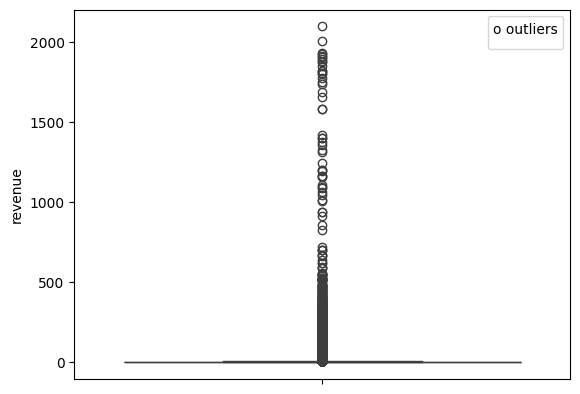

In [ ]:
#outliers of revenues
outliers_revenues=finding_outliers(dm['revenue'])
print(outliers_revenues)
sns.boxplot(data=dm,y='revenue')
plt.legend(title='o outliers')

13.	How does the effectiveness of campaigns vary based on the size of the ad and placement type?

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
 14  user_engagement_encode

In [ ]:
dm['banner'].unique()

array(['160 x 600', '240 x 400', '300 x 250', '468 x 60', '580 x 400',
       '670 x 90', '728 x 90', '800 x 250'], dtype=object)

In [ ]:
dm['placement'].unique()

array(['abc', 'def', 'ghi', 'mno', 'jkl', nan], dtype=object)

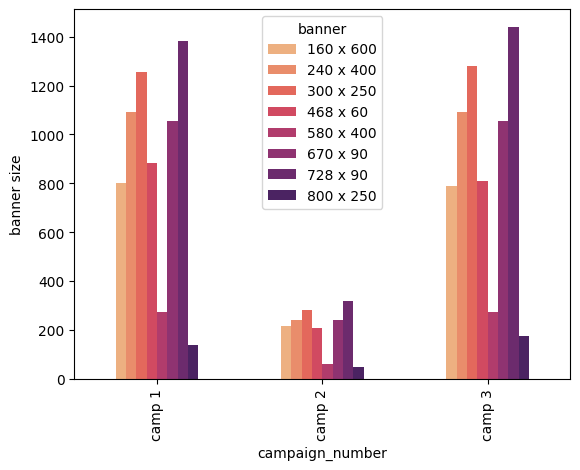

In [ ]:
#effectiveness of campaigns vary based on the size of the ad
size_of_ad=pd.crosstab(index=dm.campaign_number,columns=dm.banner)
#print(size_of_ad)
size_of_ad.plot(kind='bar',cmap=pal)
plt.ylabel('banner size')
plt.show()


Higher engagement of the banner size leads to more effectiveness of campaign_number

In [ ]:
ad_max=size_of_ad.idxmax()
print(ad_max)
size_max=size_of_ad.max()
print(size_max)

banner
160 x 600    camp 1
240 x 400    camp 3
300 x 250    camp 3
468 x 60     camp 1
580 x 400    camp 1
670 x 90     camp 3
728 x 90     camp 3
800 x 250    camp 3
dtype: object
banner
160 x 600     801
240 x 400    1093
300 x 250    1280
468 x 60      882
580 x 400     273
670 x 90     1057
728 x 90     1441
800 x 250     175
dtype: int64


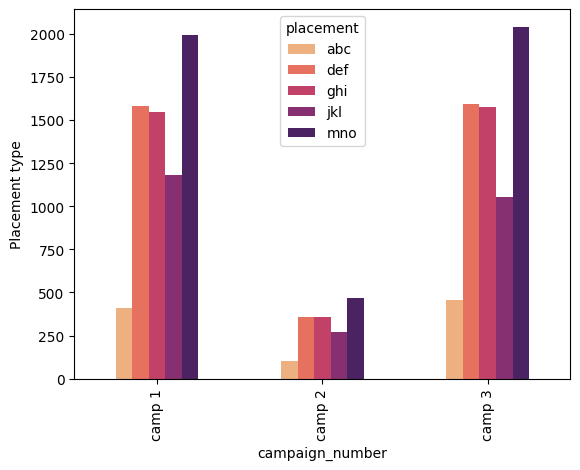

In [ ]:
#effectiveness of campaigns vary based on the  placement type
pla_type=pd.crosstab(index=dm.campaign_number,columns=dm.placement)
#print(size_of_ad)
pla_type.plot(kind='bar',cmap=pal)
plt.ylabel('Placement type')
plt.show()


14.	Are there any specific campaigns or banner sizes that consistently outperform others in terms of ROI?

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
 14  user_engagement_encode

Text(0, 0.5, 'ROI')

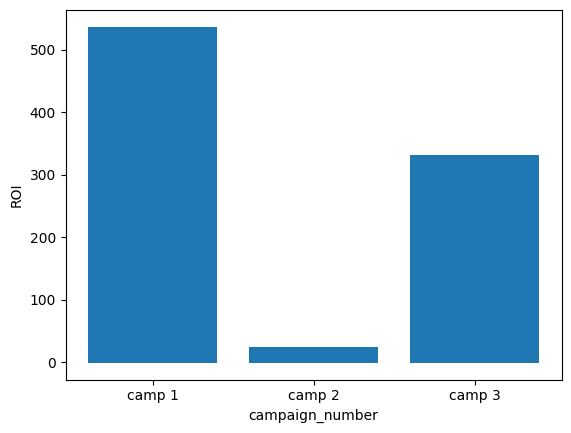

In [ ]:
revenue = dm['revenue']
cost=dm['cost']
dm['ROI'] = (revenue - cost)/ cost
#campaigns that consistently outperform others in terms of ROI
plt.bar(x='campaign_number',height='ROI',data=dm)
plt.xlabel('campaign_number')
plt.ylabel('ROI')

In [ ]:
ROI_table = dm.groupby(['campaign_number','banner'])[['cost','revenue']].sum()
ROI_table['Total']=ROI_table['cost']+ROI_table['revenue']
ROI_table

cost      revenue        Total
campaign_number banner                                         
camp 1          160 x 600  15067.7689   17806.1668   32873.9357
                240 x 400  46656.0885  112205.4961  158861.5846
                300 x 250  30949.2510   34483.4140   65432.6650
                468 x 60     172.2626      57.8980     230.1606
                580 x 400   7806.7751    8086.7042   15893.4793
                670 x 90    3387.2404    3321.0146    6708.2550
                728 x 90   46646.6067   54573.9398  101220.5465
                800 x 250      2.5866       0.7228       3.3094
camp 2          160 x 600   1551.6721    4043.1701    5594.8422
                240 x 400   7300.2817   15346.9029   22647.1846
                300 x 250   2650.5690    5624.9181    8275.4871
                468 x 60      13.4058      20.9293      34.3351
                580 x 400    684.0164    1997.1567    2681.1731
                670 x 90     304.7754     479.1348     783.9102
                728 x 90    4532.5210    7378.0059   11910.5269
                800 x 250      0.1082       0.1975       0.3057
camp 3          160 x 600    896.9919    1666.7923    2563.7842
                240 x 400   2459.2446    2377.8474    4837.0920
                300 x 250   1838.7066    3063.0211    4901.7277
                468 x 60       6.9830       8.7574      15.7404
                580 x 400    487.7815    1109.2819    1597.0634
                670 x 90     125.9411     222.7124     348.6535
                728 x 90    1651.3120    2390.2157    4041.5277
                800 x 250      0.1056       0.1623       0.2679

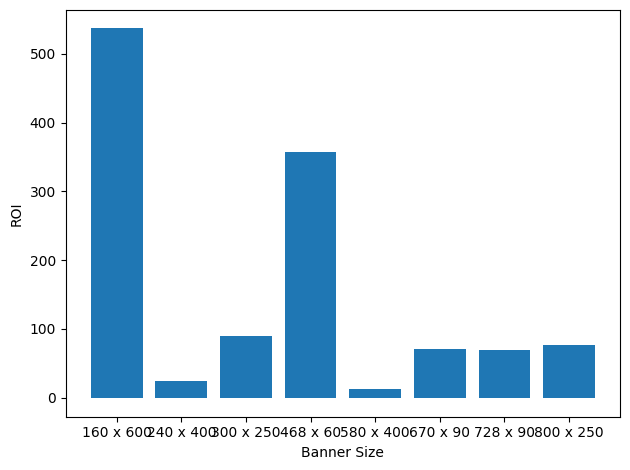

In [ ]:
#banner that consistently outperform others in terms of ROI
plt.bar(x='banner',height='ROI',data=dm)
plt.xlabel('Banner Size')
plt.ylabel('ROI')
plt.tight_layout()

15.	What is the distribution of post-click conversions across different placement types?

In [ ]:
distribution_of_pcc_in_placement=dm.groupby('placement')['post_click_conversions'].mean()
distribution_of_pcc_in_placement

,post_click_conversions
placement,
abc,0.851240
def,8.438666
ghi,96.745982
jkl,8.327875
mno,58.469229


<Axes: xlabel='placement'>

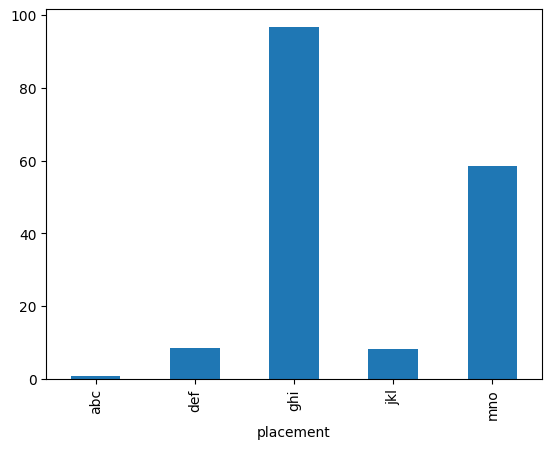

In [ ]:
distribution_of_pcc_in_placement.plot(kind='bar')

In [ ]:
max_placement = distribution_of_pcc_in_placement.idxmax()
max_pcc = distribution_of_pcc_in_placement.max()
print(f'{max_placement} have significantly higher post-click conversions average of {max_pcc} compared to the others. ​')

ghi have significantly higher post-click conversions average of 96.74598163030998 compared to the others. ​


16.	Are there any noticeable differences in user engagement levels between weekdays and weekends?

In [ ]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
 14  user_engagement_encode

User Engagement Distribution (Counts):
user_engagement  High   Low  Medium
day_type                           
weekday          4556  4691    5125
weekend           328   344     364

User Engagement Distribution (Percentages):
user_engagement       High        Low     Medium
day_type                                        
weekday          31.700529  32.639855  35.659616
weekend          31.660232  33.204633  35.135135


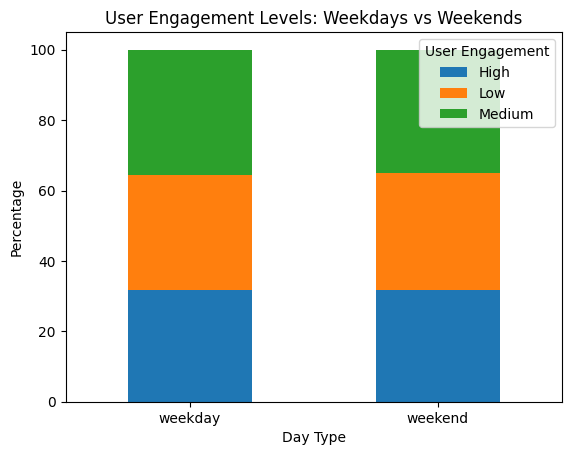

In [ ]:
dm['day_type'] = dm['day'].apply(lambda x: 'weekend' if x in [6, 7] else 'weekday')

engagement_distribution = dm.groupby(['day_type', 'user_engagement']).size().unstack().fillna(0)

engagement_distribution_percentage = engagement_distribution.div(engagement_distribution.sum(axis=1), axis=0) * 100

print("User Engagement Distribution (Counts):")
print(engagement_distribution)
print("\nUser Engagement Distribution (Percentages):")
print(engagement_distribution_percentage)

engagement_distribution_percentage.plot(kind='bar', stacked=True)
plt.title('User Engagement Levels: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='User Engagement')
plt.show()


17.	How does the cost per click (CPC) vary across different campaigns and banner sizes?

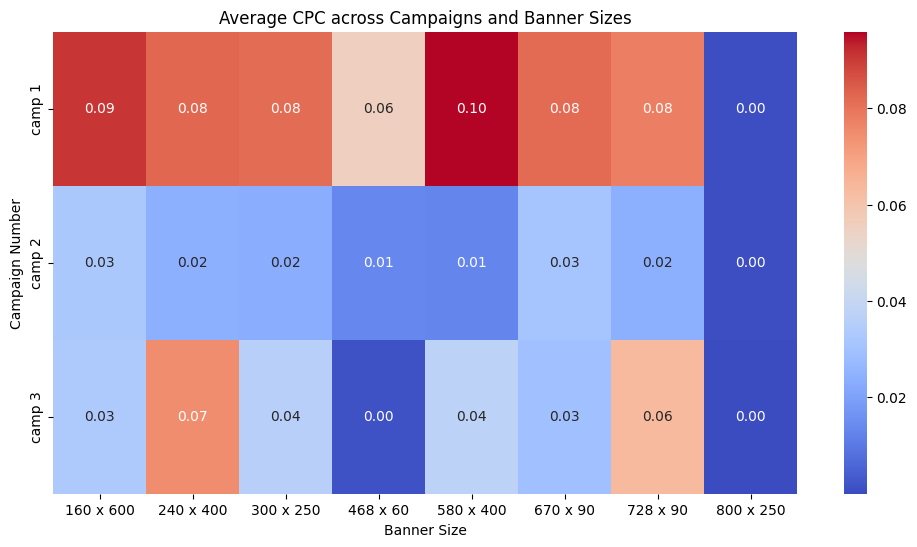

In [ ]:
dm['CPC'] = dm['cost'] / dm['clicks']
dm['CPC'] = dm['CPC'].replace([float('inf'), -float('inf')], 0)

#Group by campaign number and banner size, and calculate average CPC
cpc_variation = dm.groupby(['campaign_number', 'banner'])['CPC'].mean().unstack()

#Plot the variation of CPC across campaigns and banner sizes
plt.figure(figsize=(12, 6))
sns.heatmap(cpc_variation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Average CPC across Campaigns and Banner Sizes')
plt.xlabel('Banner Size')
plt.ylabel('Campaign Number')
plt.show()


18.	Are there any campaigns or placements that are particularly cost-effective in terms of generating post-click conversions?

In [ ]:
#Cost-Effectiveness (Conversions per Cost Unit)
dm['cost_effectiveness'] = dm['post_click_conversions'] / dm['cost']
dm['cost_effectiveness'] = dm['cost_effectiveness'].replace([float('inf'), -float('inf')], 0)

cost_effectiveness_analysis = dm.groupby(['campaign_number', 'placement'])['cost_effectiveness'].mean()

top_cost_effective = cost_effectiveness_analysis.sort_values(ascending=False).head(5)
print("Top 5 Most Cost-Effective Campaigns and Placements:")
print(top_cost_effective)


Top 5 Most Cost-Effective Campaigns and Placements:
campaign_number  placement
camp 1           jkl          3.597787
                 ghi          3.402816
                 def          2.747788
                 abc          2.608068
                 mno          2.446367
Name: cost_effectiveness, dtype: float64


19.	Can we identify any trends or patterns in post-click conversion rates based on the day of the week?

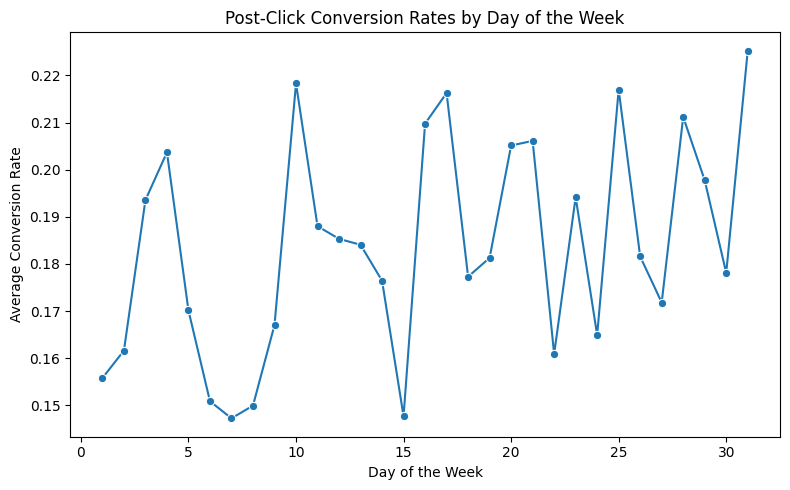

In [ ]:
# Calculate Conversion Rate (Conversions per Click)
dm['conversion_rate'] = dm['post_click_conversions'] / dm['clicks']
dm['conversion_rate'] = dm['conversion_rate'].replace([float('inf'), -float('inf')], 0)

conversion_rate_by_day = dm.groupby('day')['conversion_rate'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=conversion_rate_by_day.index, y=conversion_rate_by_day.values, marker='o')
plt.title('Post-Click Conversion Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Conversion Rate')
plt.tight_layout()
plt.show()


20.	How does the effectiveness of campaigns vary throughout different user engagement types in terms of post-click conversions?

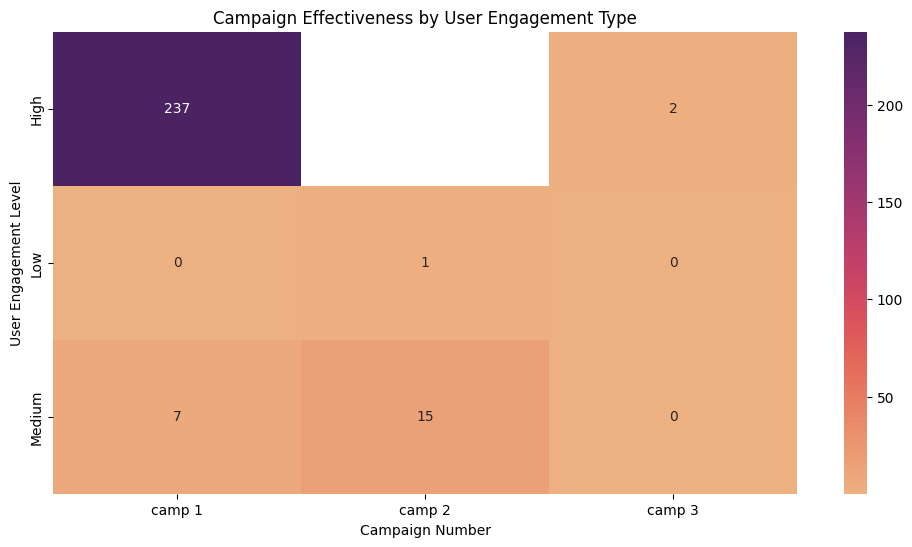

In [ ]:
effectiveness_by_engagement = dm.groupby(['user_engagement', 'campaign_number'])['post_click_conversions'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(effectiveness_by_engagement, annot=True, fmt=".0f", cmap=pal)
plt.title('Campaign Effectiveness by User Engagement Type')
plt.xlabel('Campaign Number')
plt.ylabel('User Engagement Level')
plt.show()
